<a href="https://colab.research.google.com/github/XM2202-02/CNN-FaceEmo/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [ ]:
# tao mo hinh

#
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Input,Dropout
# them kenh vao anh (bat buoc)
# x_train=np.expand_dims(x_train,axis=1),x_test....
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)),
           MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
           MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile : bien dich
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#FIT:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
# validation_data : gia tri xac thuc

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9926 - val_loss: 0.0380
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9917 - val_loss: 0.0346
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9984 - loss: 0.0049 - val_accuracy: 0.9912 - val_loss: 0.0387
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9939 - val_loss: 0.0304
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9918 - val_loss: 0.0435
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9911 - val_loss: 0.0429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9933 - val_loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9986 - loss: 0.004

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


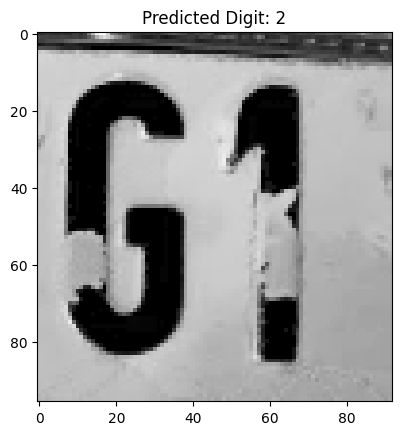

Image: </content/Ảnh chụp màn hình 2025-04-15 144453.png>, Predicted Digit: 2


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28, 28))
  img = cv2.bitwise_not(img)
  img = img.astype('float32') / 255
  return img

def predict_digit(image_path):
  img = preprocess_image(image_path)
  # Reshape to (1, 28, 28, 1) to match the model's input shape
  img = img.reshape(1, 28, 28, 1)
  prediction = model.predict(img)
  img = cv2.bitwise_not(img)
  predicted_digit = np.argmax(prediction)
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.title(f'Predicted Digit: {predicted_digit}')
  plt.show()
  return predicted_digit

predicted_digit = predict_digit("/content/Ảnh chụp màn hình 2025-04-15 144453.png")
print(f'Image: </content/Ảnh chụp màn hình 2025-04-15 144453.png>, Predicted Digit: {predicted_digit}')

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Input,Dropout
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [ ]:

model=Sequential([
    Conv2D(32,(3,3),activation='relu',padding="same",input_shape=(32,32,3)),
    Conv2D(32,(3,3),activation='relu',padding="same"), MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding="same"),
    Conv2D(64,(3,3),activation='relu',padding="same"), MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding="same"),
    Conv2D(128,(3,3),activation='relu',padding="same"), MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3113 - loss: 1.8291 - val_accuracy: 0.5485 - val_loss: 1.2359
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6219 - loss: 1.0475 - val_accuracy: 0.6810 - val_loss: 0.8991
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7122 - loss: 0.8154 - val_accuracy: 0.7270 - val_loss: 0.8027
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7642 - loss: 0.6707 - val_accuracy: 0.7454 - val_loss: 0.7526
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8024 - loss: 0.5671 - val_accuracy: 0.7526 - val_loss: 0.7471
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8294 - loss: 0.4872 - val_accuracy: 0.7570 - val_loss: 0.7366
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8529 - loss: 0.4144 - val_accuracy: 0.7633 - val_loss: 0.7644
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8746 - loss: 0.357

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


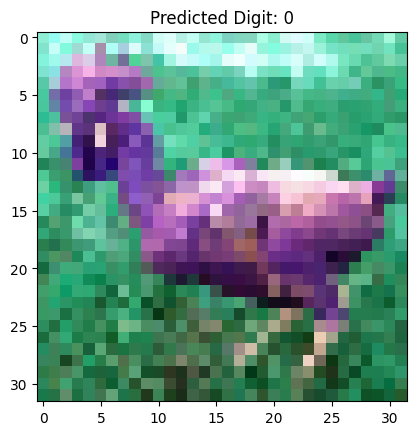

Image: </content/Ảnh chụp màn hình 2025-04-15 150850.png, day la so: 0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.resize(img, (32, 32))
  img = img.astype('float32') / 255
  return img

def predict_digit(image_path):
  img = preprocess_image(image_path)
  img = img.reshape(1, 32, 32, 3)
  prediction = model.predict(img)
  predicted_digit = np.argmax(prediction)
  plt.imshow(img[0])
  plt.title(f'Predicted Digit: {predicted_digit}')
  plt.show()
  return predicted_digit

predicted_digit = predict_digit("/content/Ảnh chụp màn hình 2025-04-15 150850.png")
print(f'Image: </content/Ảnh chụp màn hình 2025-04-15 150850.png, day la so: {predicted_digit}')